In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('msft.csv')

df.columns = ['Date', 'Open', 'High', 'Low', 'Close', "Volume"]

#print the head
df.head()



,Date,Open,High,Low,Close,Volume
0,2000-01-18,111.81,116.50,111.75,115.31,40741800.0
1,2000-01-19,110.50,111.50,106.00,107.00,48784100.0
2,2000-01-20,107.06,109.69,105.87,106.00,28174900.0
3,2000-01-21,107.00,107.25,103.25,103.75,34208100.0
4,2000-01-24,103.80,105.69,100.81,101.25,31798800.0


C:\Users\hakng\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


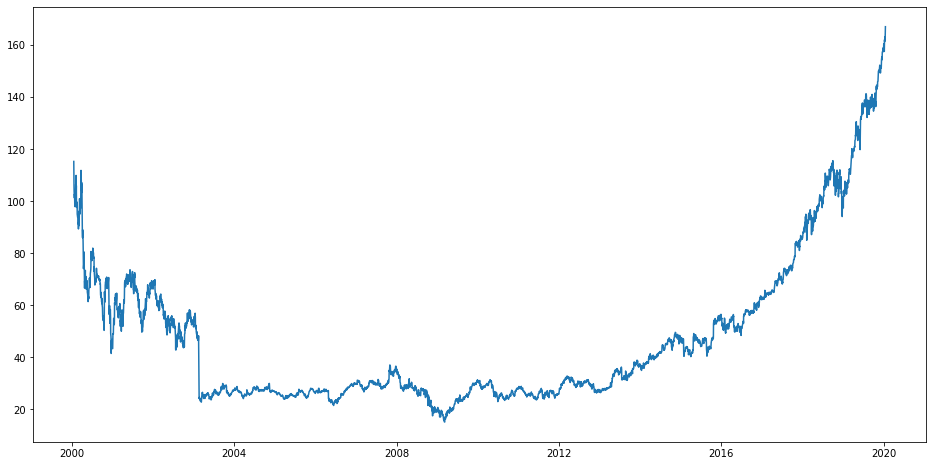

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [14]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('msft.csv')

df.columns = ['Date', 'Open', 'High', 'Low', 'Close', "Volume"]

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:-1000]
valid = new_data[-1000:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-1000+i:].sum() + sum(preds)
    b = a/1000
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

         Date    Open    High     Low   Close      Volume
0  2000-01-18  111.81  116.50  111.75  115.31  40741800.0
1  2000-01-19  110.50  111.50  106.00  107.00  48784100.0
2  2000-01-20  107.06  109.69  105.87  106.00  28174900.0
3  2000-01-21  107.00  107.25  103.25  103.75  34208100.0
4  2000-01-24  103.80  105.69  100.81  101.25  31798800.0

 Shape of the data:
(5033, 6)

 Shape of training set:
(4033, 2)

 Shape of validation set:
(1000, 2)

 RMSE value on validation set:
57.64069986653598


C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


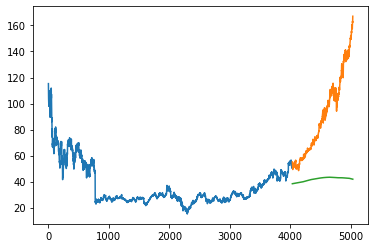

In [15]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [26]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close', 'Year', 'Month', 'Day', 
                                                        'WeekOfYr', 'DayOfYr', 'DayOfWk', 
                                                        'StartOfYr', 'EndOfYr', 'StartOfQtr', 'EndOfQtr', 
                                                        'StartOfMth', 'EndOfMth', 'StartOfWk', 'EndOfWk'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [27]:
new_data.head()

,Date,Close,Year,Month,Day,WeekOfYr,DayOfYr,DayOfWk,StartOfYr,EndOfYr,StartOfQtr,EndOfQtr,StartOfMth,EndOfMth,StartOfWk,EndOfWk
0,2000-01-18 00:00:00,115.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-19 00:00:00,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-20 00:00:00,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-21 00:00:00,103.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-24 00:00:00,101.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
import calendar
import datetime

def is_month_start_end(date):
    
    last_day_of_mth = calendar.monthrange(date.year, date.month)[1]
    
    return (date.day == 1, date.day == last_day_of_mth)


def is_quarter_start_end(date):
    
    start_qtr_mths = [1, 4, 7, 10]
    end_qtr_mths = [3, 6, 9, 13]
    
    # Check for start of quarter
    qtr_start = (date.month in start_qtr_mths) and (date.day == 1)
    
    # Check for end of quarter
    qtr_end = (date.month in end_qtr_mths) and (date.day == calendar.monthrange(date.year, date.month)[1])
    
    return (qtr_start, qtr_end)


def is_year_start_end(date):
    
    yr_start = (date.day == 1) and (date.month == 1)
    
    yr_end = (date.day == 31) and (date.month == 12)
    
    return (yr_start, yr_end)


def get_date_features(date):
    
    year = date.year
    month = date.month
    day = date.day
    
    (year, wkOfYr, dayOfWk) = datetime.date(year, month, day).isocalendar()
    
    dayOfYr = datetime.date(year, month, day).timetuple().tm_yday
    
    mon_fri = (dayOfWk == 1) or (dayOfWk == 5)
    
    return year, month, day, wkOfYr, dayOfYr, dayOfWk, is_year_start_end(date), is_quarter_start_end(date), is_month_start_end(date), ((dayOfWk == 1), (dayOfWk == 5))

In [29]:
get_date_features(datetime.date(2020, 6, 3))

(2020,
 6,
 3,
 23,
 155,
 3,
 (False, False),
 (False, False),
 (False, False),
 (False, False))

In [30]:
#‘Year’, ‘Month’, ‘Week’, ‘Day’, 
#‘Dayofweek’, ‘Dayofyear’, 
#‘Is_month_end’, ‘Is_month_start’, ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’.

import datetime

for i in range(0,len(new_data)):
    
    features = get_date_features(new_data['Date'][i])
    
    new_data['Year'][i] = features[0]
    new_data['Month'][i] = features[1]
    new_data['Day'][i] = features[2]
    
    new_data['WeekOfYr'][i] = features[3]
    new_data['DayOfYr'][i] = features[4]
    new_data['DayOfWk'][i] = features[5]
    
    new_data['StartOfYr'][i] = features[6][0]
    new_data['EndOfYr'][i] = features[6][1]
    
    new_data['StartOfQtr'][i] = features[7][0]
    new_data['EndOfQtr'][i] = features[7][1]
    
    new_data['StartOfMth'][i] = features[8][0]
    new_data['EndOfMth'][i] = features[8][1]
    
    new_data['StartOfWk'][i] = features[9][0]
    new_data['EndOfWk'][i] = features[9][1]
    
    

In [31]:
new_data.head(10)

,Date,Close,Year,Month,Day,WeekOfYr,DayOfYr,DayOfWk,StartOfYr,EndOfYr,StartOfQtr,EndOfQtr,StartOfMth,EndOfMth,StartOfWk,EndOfWk
0,2000-01-18 00:00:00,115.31,2000,1,18,3,18,2,False,False,False,False,False,False,False,False
1,2000-01-19 00:00:00,107,2000,1,19,3,19,3,False,False,False,False,False,False,False,False
2,2000-01-20 00:00:00,106,2000,1,20,3,20,4,False,False,False,False,False,False,False,False
3,2000-01-21 00:00:00,103.75,2000,1,21,3,21,5,False,False,False,False,False,False,False,True
4,2000-01-24 00:00:00,101.25,2000,1,24,4,24,1,False,False,False,False,False,False,True,False
5,2000-01-25 00:00:00,102.81,2000,1,25,4,25,2,False,False,False,False,False,False,False,False
6,2000-01-26 00:00:00,99.37,2000,1,26,4,26,3,False,False,False,False,False,False,False,False
7,2000-01-27 00:00:00,98.75,2000,1,27,4,27,4,False,False,False,False,False,False,False,False
8,2000-01-28 00:00:00,98.25,2000,1,28,4,28,5,False,False,False,False,False,False,False,True
9,2000-01-31 00:00:00,97.87,2000,1,31,5,31,1,False,False,False,False,False,True,True,False


In [32]:
new_data['DayOfWk'].value_counts()

3    1032
2    1030
4    1014
5    1011
1     946
Name: DayOfWk, dtype: int64

In [33]:
new_data = new_data.drop('Date', axis=1)

#split into train and validation
train = new_data[:-1000]
valid = new_data[-1000:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

74.94848853808277

C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


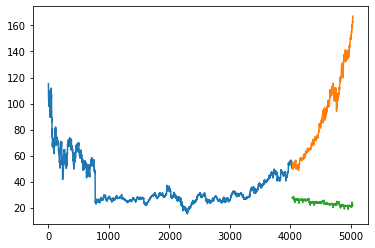

In [36]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[-1000:].index
train.index = new_data[:-1000].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [37]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [38]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

C:\Users\hakng\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

67.91947598081053

C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


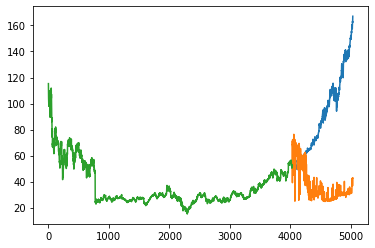

In [40]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [41]:
from pmdarima.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:-1000]
valid = data[-1000:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=1000)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11783.491, BIC=11814.986, Fit time=41.463 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=14321.456, BIC=14334.054, Fit time=0.778 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=13238.771, BIC=13263.967, Fit time=7.974 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11779.281, BIC=11804.477, Fit time=51.530 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=14319.472, BIC=14325.771, Fit time=0.489 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=14152.688, BIC=14177.884, Fit time=26.311 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1

In [22]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

44.93884601019467

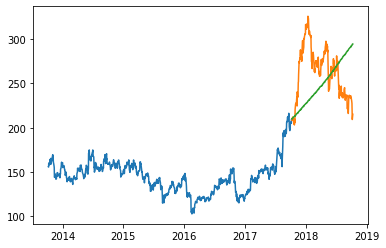

In [25]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [19]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:987]
valid = new_data[987:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

56.93496825202469

C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


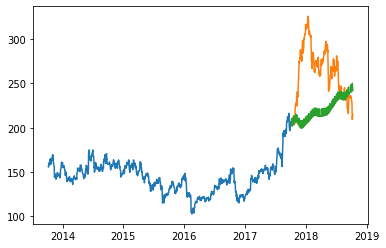

In [21]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [74]:
df_msft = pd.read_csv('daily_MSFT-full.csv')

df_msft.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Total Trade Quantity']
df_msft = df_msft.set_index('Date')

data = df_msft

data

,Open,High,Low,Close,Total Trade Quantity
Date,,,,,
2020-01-13,161.7600,163.310,161.2600,163.28,18666414
2020-01-10,162.8235,163.220,161.1800,161.34,20733946
2020-01-09,161.8350,162.215,161.0300,162.09,21399951
2020-01-08,158.9300,160.800,157.9491,160.09,27762026
2020-01-07,159.3200,159.670,157.3200,157.58,21881740
...,...,...,...,...,...
2000-01-19,110.5000,111.500,106.0000,107.00,48784100
2000-01-18,111.8100,116.500,111.7500,115.31,40741800
2000-01-14,107.1900,113.940,105.7500,112.25,36708200


In [65]:
data.isnull().sum()

Open                    0
High                    0
Low                     0
Close                   0
Total Trade Quantity    0
dtype: int64

In [77]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

new_data

,Close
Date,
2018-10-08,215.15
2018-10-05,209.2
2018-10-04,218.2
2018-10-03,227.6
2018-10-01,230.9
...,...
2013-10-14,159.45
2013-10-11,160.05
2013-10-10,160.15


In [78]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 71s - loss: 0.0032


In [79]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

9.243625739547364

C:\Users\hakng\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the

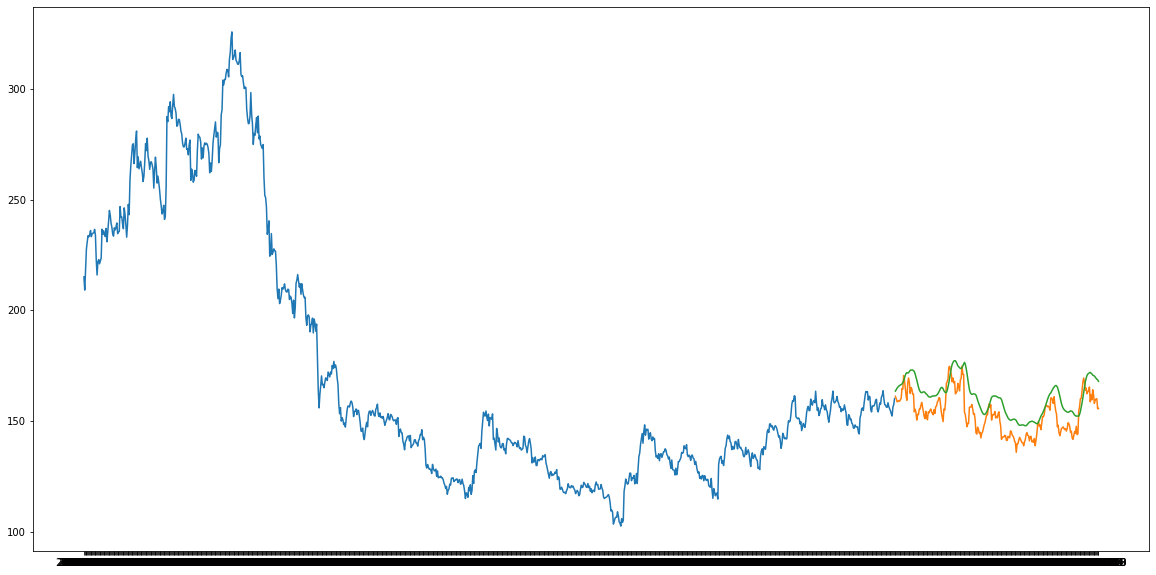

In [81]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [29]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
